##Measuring WEATHER in contrast with DAMAGE


In [1]:
!pip install nltk

import nltk
!nltk.download('all')
from nltk.corpus import wordnet as wn

/bin/bash: -c: line 0: syntax error near unexpected token `'all''
/bin/bash: -c: line 0: `nltk.download('all')'


In [2]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
### Generate synonyms and hyponyms using Wordnet

def generate_wordnet_list(word_base,languages,exclude_list):
  word_lists = []

  #iterate over languages
  for language in languages:
    word_list = []

    # iterate over words in the word_base list
    for word in word_base:

      ## iterate over different meanings of the word synsets
      for meaning in wn.synsets(word, pos=wn.NOUN+wn.VERB+wn.ADJ):
        if meaning.name() not in exclude_list:
          print(meaning)
          print(meaning.definition())
          print('\n')


          ## iterate over different synonyms and add them to list
          for synonym in meaning.lemmas(language):
            #print(synonym)

            ## if the synonym is no in the list add it
            if synonym.name() not in word_list:
              word_list.append(synonym.name())
              #print(synonym.name())

          ## iterate over hyponyms
          for hyponym in meaning.hyponyms():
            #print(hyponym.lemmas(language))

            ## iterate over synonyms of hyponyms
            for synonym_of_hyponym in hyponym.lemmas(language):
              #print(synonym_of_hyponym.name())

              ## if the synonym of the hyponym is no in the list add it
              if synonym_of_hyponym.name() not in word_list:
                word_list.append(synonym_of_hyponym.name())

    ## add the language-specific word list to the global word list, sort the words in alphabetic order   
    word_lists +=[sorted(word_list)]

  ## there are 3 lists now, one for each language, we iterate over the list of lists and print each
  for lst in word_lists:
    print(lst)
    return(lst)

In [23]:
from gensim.models.word2vec import Word2Vec
import os
from os import path

## This function organizes corpus as list of sentences, and each sentence as a list of words,
## as input to the function WordVec

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## This will be a list of clean sentences
word2vec_input = []

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:
        if '.txt' in file and 'model' not in file:
            print(file)
            name = os.path.join(path, file)
        
            file_text = open(name, encoding = 'unicode_escape').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                word2vec_input += [paragraph.split(' ')]
            
                #print(word2vec_input)

/content
li etal-2010-hybrid solar electricity system.txt
varo-2013-Design.txt
Christian etal-2009-predictingdomestic.txt
Shanmugapriya etal-2018-solar linear fresnel.txt
riffat-2017-Overview.txt
jiang etal-2013- Design and performan.txt
tham-2011-Energy.txt
Zhang etal-2015-heat transfer of energy.txt
Zheng-2018-solar.txt
yadav etal-2020-Sustainable.txt
bANSAL-2009-evaporative cooling.txt
li etal-2019-Effect of design.txt
khoshbazan etal-2018-Thermo economic analy.txt
hegazy-2020-Toward efficient energy con.txt
d'alessandro etal-2016-Innovative concretes for low carbon constructions.txt
Zhang etal-2016-indoor air thermal.txt
ong-2011-Experimental.txt
jian yao-2012-Effect.txt
mohamed-2011-Exploring.txt
lim etal-2013-Design config.txt
aydin etal-2015-Numerical analysis of solar.txt
jorge-2010-linear Fresnel.txt
Ge etal-2009-water absorption.txt
Mojtaba-2018-natural.txt
eloka and onunka-2020-Sustainable.txt
chien-2014-Assessment.txt
ONG-2016-Reviewofsolar.txt
shattat-2012-Water.txt
gan-20

In [24]:
weather = ['meteorological','climatic','sky','geographical','locations']
print("Lenghth of list:", len(weather))
print("Used words:", weather)

Lenghth of list: 5
Used words: ['meteorological', 'climatic', 'sky', 'geographical', 'locations']


In [33]:
damage = ['degradation','drastically','overheating','adverse','risks','exacerbate','risk','intensify','instability','deformation','strive','warming','cause','deterioration']
print("Lenghth of list:", len(damage))
print("Used words:", damage)

Lenghth of list: 14
Used words: ['degradation', 'drastically', 'overheating', 'adverse', 'risks', 'exacerbate', 'risk', 'intensify', 'instability', 'deformation', 'strive', 'warming', 'cause', 'deterioration']


In [34]:
languages = ['eng']

exclude_list_weather = ['flip.v.06','placement.n.03','localization.n.01','location.n.04'   ] 
weather_list = generate_wordnet_list(weather,languages,exclude_list_weather)

Synset('meteorologic.a.01')
of or pertaining to atmospheric phenomena, especially weather and weather conditions


Synset('climatic.a.01')
of or relating to a climate


Synset('sky.n.01')
the atmosphere and outer space as viewed from the earth


Synset('geographic.a.01')
of or relating to the science of geography


Synset('geographic.a.02')
determined by geography


Synset('location.n.01')
a point or extent in space


['Earth', 'base', 'bilocation', 'blue', 'blue_air', 'blue_sky', 'climatic', 'climatical', 'earth', 'east', 'geographic', 'geographical', 'here', 'home', 'jungle', 'line', 'location', 'mackerel_sky', 'meteoric', 'meteorologic', 'meteorological', 'mountain_pass', 'north', 'northeast', 'northwest', 'notch', 'outer_space', 'part', 'pass', 'point', 'region', 'seat', 'sky', 'sodom', 'somewhere', 'south', 'southeast', 'southwest', 'space', 'there', 'west', 'whereabouts', 'wild_blue_yonder']


In [35]:
languages = ['eng']

exclude_list_damage =['abasement.n.01','gamble.v.01','cause.n.02','campaign.n.02','causal_agent.n.01','lawsuit.n.01']
damage_list = generate_wordnet_list(damage,languages,exclude_list_damage)

Synset('degradation.n.01')
changing to a lower state (a less respected state)


Synset('overheating.n.01')
excessive heating


Synset('overheat.v.01')
get excessively and undesirably hot


Synset('overheat.v.02')
make excessively or undesirably hot


Synset('adverse.s.01')
contrary to your interests or welfare


Synset('adverse.s.02')
in an opposing direction


Synset('hazard.n.01')
a source of danger; a possibility of incurring loss or misfortune


Synset('risk.n.02')
a venture undertaken without regard to possible loss or injury


Synset('risk.n.03')
the probability of becoming infected given that exposure to an infectious agent has occurred


Synset('risk.n.04')
the probability of being exposed to an infectious agent


Synset('risk.v.01')
expose to a chance of loss or damage


Synset('worsen.v.02')
make worse


Synset('exacerbate.v.02')
exasperate or irritate


Synset('hazard.n.01')
a source of danger; a possibility of incurring loss or misfortune


Synset('risk.n.02')
a venture und

In [36]:
## Here we build the vector space with Word2Vec

SentenceCorpus = word2vec_input
word2vec_output = Word2Vec(SentenceCorpus, min_count=1)

In [37]:
## Save vector space

word2vec_output.save('w2v_model_hf.txt')

## Use the vector semantic map to evaluate if the bags of words created in are ecologically valid

In [38]:
###  funtion to use word2vec to inquiry about the 20 most similar semantically words to each seed word in word_list

def get_word2vec_list(word_list,model):

  list_of_word2vec_lists = []
  for word in word_list:
    try:

      ## here is the crucial line - we are using the model that we trained to get the most similar words within our corpus
      list_vects=model.wv.most_similar([word],topn=10)

      new_list = []
      new_list +=[word]
      for item in list_vects:
        #word1 = item[0]
        word1 = item
        new_list += [word1]

      #print(new_list)
      #print('\n')
      list_of_word2vec_lists += [new_list]


    
    except KeyError:
      continue
  return(list_of_word2vec_lists)

In [39]:
## open vector space for english in the early modern period
model = Word2Vec.load('w2v_model_hf.txt')

In [41]:
## get word2vec words for hope
list_of_weather_w2v = get_word2vec_list(weather_list,model)

index =0
for w2v_list in list_of_weather_w2v:
  print(index, w2v_list)
  index +=1

0 ['Earth', ('Programme', 0.9120467305183411), ('Office', 0.9108601212501526), ('Industry,', 0.9098035097122192), ('Programme.', 0.9094544649124146), ('Community', 0.9093625545501709), ('Buildings,', 0.9068456292152405), ('Information', 0.9066569805145264), ('Florida', 0.9057429432868958), ('Rural', 0.9053620100021362), ('Rating', 0.9047514200210571)]
1 ['base', ('reference', 0.8371334671974182), ('measurement', 0.8009117245674133), ('fixed', 0.7859483957290649), ('working', 0.7816032767295837), ('same', 0.7759279608726501), ('domain', 0.7730796337127686), ('variable', 0.7680230736732483), ('short', 0.7675915360450745), ('third', 0.7594510912895203), ('basic', 0.7539644241333008)]
2 ['blue', ('red', 0.912280797958374), ('skewness', 0.8662407994270325), ('shape,', 0.8577110767364502), ('unconfined', 0.8546953201293945), ('VR', 0.8541175127029419), ('flange', 0.8449947834014893), ('HV', 0.8422521352767944), ('UA', 0.8419053554534912), ('FRP', 0.841356098651886), ('B1', 0.841295599937439)

In [42]:
## chose from the word2vec outputs, the lists that seem to have clouds of meanings coherent with fear
relevant_weather_w2v_words = list( list_of_weather_w2v[i] for i in [0,3,4,6,7,12,])
3

## Add all the words into one final bags of words
weather_BoW = [item for sublist in relevant_weather_w2v_words for item in sublist]

print(weather_BoW)


['Earth', ('Programme', 0.9120467305183411), ('Office', 0.9108601212501526), ('Industry,', 0.9098035097122192), ('Programme.', 0.9094544649124146), ('Community', 0.9093625545501709), ('Buildings,', 0.9068456292152405), ('Information', 0.9066569805145264), ('Florida', 0.9057429432868958), ('Rural', 0.9053620100021362), ('Rating', 0.9047514200210571), 'climatic', ('weather', 0.8631500005722046), ('extreme', 0.8269969820976257), ('conditions', 0.7886391878128052), ('conditions,', 0.7861499190330505), ('living', 0.7860540151596069), ('boundary', 0.7860039472579956), ('zones', 0.7851294279098511), ('unfavourable', 0.7805923223495483), ('(spring)', 0.7768741846084595), ('regions', 0.7751764059066772), 'earth', ('seawater', 0.8262271881103516), ('vegetation', 0.8256518840789795), ('window', 0.8210914731025696), ('canyon', 0.8189000487327576), ('core', 0.8149315118789673), ('street', 0.8125170469284058), ('body', 0.8113625049591064), ('exterior', 0.8099583387374878), ('interior', 0.80604392290

In [43]:
## get word2vec words for hope
list_of_damage_w2v = get_word2vec_list(damage_list,model)

index =0
for w2v_list in list_of_damage_w2v:
  print(index, w2v_list)
  index +=1

0 ['accelerate', ('be,', 0.9474091529846191), ('defy', 0.8960240483283997), ('fulfill', 0.8937596082687378), ('happen', 0.8904565572738647), ('die.', 0.88267982006073), ('undermine', 0.8810200691223145), ('handle', 0.879493772983551), ('sell', 0.8746632933616638), ('this?', 0.8721227645874023), ('resemble', 0.8712793588638306)]
1 ['actuate', ('attain', 0.7621660232543945), ('guarantee', 0.7223634719848633), ('unravel', 0.7208147644996643), ('induce', 0.714951753616333), ('handle', 0.7081896066665649), ('dissociates', 0.7079852819442749), ('sovereignty?', 0.7046874165534973), ('invert', 0.7042869329452515), ('weaken', 0.6990172863006592), ('acquire', 0.6936932802200317)]
2 ['adverse', ('negatively', 0.8627216815948486), ('dangerous', 0.8528053164482117), ('detrimental', 0.8484013080596924), ('clouds', 0.8467533588409424), ('ecosystems', 0.8393658399581909), ('noise', 0.8361979722976685), ('UHI', 0.8316624760627747), ('respiratory', 0.8214708566665649), ('authorities', 0.8184630870819092

In [44]:
## chose from the word2vec outputs, the lists that seem to have clouds of meanings coherent with fear
relevant_damage_w2v_words = list( list_of_damage_w2v[i] for i in [2,6,11,16,17,18,19,22,23,24,25,27,29,40,49,52,57,59,64,70,71,72,82,96,99,100,102,103])


## Add all the words into one final bags of words
damage_BoW = [item for sublist in relevant_damage_w2v_words for item in sublist]

print(damage_BoW)

['adverse', ('negatively', 0.8627216815948486), ('dangerous', 0.8528053164482117), ('detrimental', 0.8484013080596924), ('clouds', 0.8467533588409424), ('ecosystems', 0.8393658399581909), ('noise', 0.8361979722976685), ('UHI', 0.8316624760627747), ('respiratory', 0.8214708566665649), ('authorities', 0.8184630870819092), ('damage', 0.8182228207588196), 'bother', ('s-COD', 0.8230822086334229), ('accept', 0.8097023963928223), ('patient', 0.8016932010650635), ('migrate', 0.7998337745666504), ('circumstance', 0.7910664081573486), ('radical', 0.7895918488502502), ('Perhaps', 0.7880083918571472), ('Lanzini', 0.7858659625053406), ('endemic', 0.7853835821151733), ('convenient,', 0.7849662899971008), 'cause', ('affect', 0.8999785780906677), ('lead', 0.8781032562255859), ('reflect', 0.8577261567115784), ('occur,', 0.8500556349754333), ('play', 0.8337452411651611), ('bring', 0.8334330320358276), ('happen', 0.8284993171691895), ('suspend', 0.8269653916358948), ('remain', 0.825608491897583), ('destr

## Frequency Analysis

In [45]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text
## In this example author, year and title are expressed in the file name 

import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

/content
li etal-2010-hybrid solar electricity system.txt
varo-2013-Design.txt
Christian etal-2009-predictingdomestic.txt
Shanmugapriya etal-2018-solar linear fresnel.txt
riffat-2017-Overview.txt
jiang etal-2013- Design and performan.txt
tham-2011-Energy.txt
Zhang etal-2015-heat transfer of energy.txt
Zheng-2018-solar.txt
yadav etal-2020-Sustainable.txt
bANSAL-2009-evaporative cooling.txt
li etal-2019-Effect of design.txt
khoshbazan etal-2018-Thermo economic analy.txt
hegazy-2020-Toward efficient energy con.txt
d'alessandro etal-2016-Innovative concretes for low carbon constructions.txt
Zhang etal-2016-indoor air thermal.txt
ong-2011-Experimental.txt
jian yao-2012-Effect.txt
mohamed-2011-Exploring.txt
lim etal-2013-Design config.txt
aydin etal-2015-Numerical analysis of solar.txt
jorge-2010-linear Fresnel.txt
Ge etal-2009-water absorption.txt
Mojtaba-2018-natural.txt
eloka and onunka-2020-Sustainable.txt
chien-2014-Assessment.txt
ONG-2016-Reviewofsolar.txt
shattat-2012-Water.txt
gan-20

In [46]:
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text'])
  
# print dataframe.
df

,author,year,title,tokenized_text
0,li etal,2010,hybrid solar electricity system.txt,"[Novel, design, and, simulation, of, a, hybrid..."
1,varo,2013,Design.txt,"[Design, of, a, celestial, vault, image, captu..."
2,Christian etal,2009,predictingdomestic.txt,"[An, artificial, neural, network, for, predict..."
3,Shanmugapriya etal,2018,solar linear fresnel.txt,"[Performance, investigation, of, linear, evacu..."
4,riffat,2017,Overview.txt,"[Overview, of, working, fluids, and, sustainab..."
...,...,...,...,...
602,dakwale and ralegaonkar,2011,Review of carbon emission through buildings.txt,"[Review, of, carbon, emission, through, buildi..."
603,chen etal,2016,Modeling.txt,"[Modeling, and, performance, analyses, of, fin..."
604,oyieke,2018,Interfacial.txt,"[Interfacial, heat, and, mass, transfer, analy..."
605,wuetal,2020,Application.txt,[................................................


In [47]:
## Create a function to calculate word counts of a particular bag of words
from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  #print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    #print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)

In [48]:
## count all the words in each text pertaining to the bag of words hope and fear

list_weather_counts=[]
list_damage_counts=[]

for text in df['tokenized_text']:
  weather_count = count_BOW(weather_BoW, text)
  list_weather_counts+=[weather_count]

  damage_count = count_BOW(damage_BoW, text)
  list_damage_counts+=[damage_count]

In [49]:
## Add the counts of bags of words to the dataFrame

df['weather'] = list_weather_counts
df['damage'] = list_damage_counts

df

,author,year,title,tokenized_text,weather,damage
0,li etal,2010,hybrid solar electricity system.txt,"[Novel, design, and, simulation, of, a, hybrid...",0,0
1,varo,2013,Design.txt,"[Design, of, a, celestial, vault, image, captu...",3,2
2,Christian etal,2009,predictingdomestic.txt,"[An, artificial, neural, network, for, predict...",0,2
3,Shanmugapriya etal,2018,solar linear fresnel.txt,"[Performance, investigation, of, linear, evacu...",0,0
4,riffat,2017,Overview.txt,"[Overview, of, working, fluids, and, sustainab...",1,20
...,...,...,...,...,...,...
602,dakwale and ralegaonkar,2011,Review of carbon emission through buildings.txt,"[Review, of, carbon, emission, through, buildi...",4,2
603,chen etal,2016,Modeling.txt,"[Modeling, and, performance, analyses, of, fin...",0,0
604,oyieke,2018,Interfacial.txt,"[Interfacial, heat, and, mass, transfer, analy...",0,0
605,wuetal,2020,Application.txt,[................................................,0,0


In [51]:
df['weather-damage-ratio'] = (df['weather'] - df['damage'])/(df['weather'] + df['damage'])

df

,author,year,title,tokenized_text,weather,damage,weather-damage-ratio
0,li etal,2010,hybrid solar electricity system.txt,"[Novel, design, and, simulation, of, a, hybrid...",0,0,NaN
1,varo,2013,Design.txt,"[Design, of, a, celestial, vault, image, captu...",3,2,0.200000
2,Christian etal,2009,predictingdomestic.txt,"[An, artificial, neural, network, for, predict...",0,2,-1.000000
3,Shanmugapriya etal,2018,solar linear fresnel.txt,"[Performance, investigation, of, linear, evacu...",0,0,NaN
4,riffat,2017,Overview.txt,"[Overview, of, working, fluids, and, sustainab...",1,20,-0.904762
...,...,...,...,...,...,...,...
602,dakwale and ralegaonkar,2011,Review of carbon emission through buildings.txt,"[Review, of, carbon, emission, through, buildi...",4,2,0.333333
603,chen etal,2016,Modeling.txt,"[Modeling, and, performance, analyses, of, fin...",0,0,NaN
604,oyieke,2018,Interfacial.txt,"[Interfacial, heat, and, mass, transfer, analy...",0,0,NaN
605,wuetal,2020,Application.txt,[................................................,0,0,NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


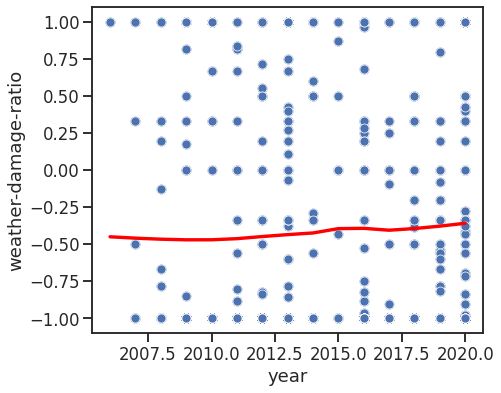

In [52]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df, lowess=True, line_kws={"color": "red"}, x="year", y="weather-damage-ratio")
sns.scatterplot(data=df, x="year", y="weather-damage-ratio", ci=None)

In [ ]:
# NEW_df = df.to_csv(['adap_threat.csv'], axis=1)
new_df = df.drop(['tokenized_text', 'weather','damage'], axis=1)
new_df.to_csv('weather_change.csv')